# 1. Contextualizado o Problema

## 1.1 Contexto Geral

- O CEO da Amazon contratou um time de cientistas de dados para trabalhar em diferentes vertentes da empresa, e você ficou encarregado de fazer um sistema de recomendação para os clientes Amazon. Para isso, te deram acesso à uma base de dados não muito estruturada em Json: um arquivo de metadata com informações dos produtos e outro com as avaliações.

- O CEO deseja que seu algoritmo de recomendação seja exclusivamente em cima de avaliações verificadas (campo `verified`=True no arquivo de avaliações). Contudo, há uma base sem classificação e que o CEO faz questão de que seja
adicionada no sistema de recomendação (valores com missing value na coluna `verified`). 

- Para isso, você precisará classificar se estas avaliações são verificadas ou não, e no caso positivo, adicioná-los no sistema de recomendação.

- Adicionalmente, o CEO tam bém deseja saber de possíveis associações e/ou correlações nesta base de dados que você vai trabalhar.

## 1.2 Objetivos

- Carregar, limpar e fazer análises exploratórias no banco de dados fornecido;

- Classificar a base sem informação para incluir as observações das avaliações verificadas no sistema de recomendação;

- Desenvolver e entregar um sistema de recomendação, com exemplos de aplicação.

- O desenvolvimento e a decisão do modelo é totalmente sua, portanto se achar que deve utilizar um valor/ procedimento diferente, sinta-se livre para fazer os testes e validar suas hipóteses para achar o resultado coerente.

- LIMPEZA DOS DADOS: Aqui você deve limpar e explorar os dados para decidir variáveis que possam ser úteis para classificação de avaliações verificadas. Você também deve levantar associações e/ou correlação para apresentar ao CEO


- EDA Realize uma EDA da forma como preferir, explore os dados, levante ideias, avalie correlações.

  - 1° ETAPA CLASSIFICAÇÃO: Aqui você deve utilizar as variáveis estudadas na primeira parte para classificar as avaliações sem label. Deve-se avaliar os modelos criados, tunar ao menos um modelo selecionado e utilizá-lo na classificação. Após classificação, não se esqueça de remover as avaliações
não verificadas.

  - 2° ETAPA RECOMENDAÇÃO: Aqui você deve desenvolver um sistema de recomendação e mostrá-lo na prática para o CEO. Tente prever possíveis erros
para evitá-los de antemão. Por exemplo, caso o produto requisitado não esteja na matriz/base, aponte os 10 mais vendidos.

# 2. Pacotes Python

In [80]:
# Bibliotecas Gerais
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt
import seaborn                 as sns
import random
import sys
import time
from scipy                     import stats

# Bibliotecas do Colab
from google.colab              import drive

# Bibliotecas Classificação
from sklearn.model_selection       import train_test_split, GridSearchCV
from sklearn.model_selection       import RandomizedSearchCV
from sklearn                       import metrics
from sklearn.preprocessing         import MinMaxScaler
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.naive_bayes           import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.svm                   import SVC
from sklearn.neural_network        import MLPClassifier
from sklearn.metrics               import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics               import classification_report
from sklearn.metrics               import plot_confusion_matrix
from sklearn.metrics               import plot_roc_curve

# Bibliotecas de Recomendação
from sklearn.metrics.pairwise      import cosine_similarity

# Redução de Dimensionalidade
from sklearn.decomposition           import PCA
from sklearn.decomposition           import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# 3. Leitura de Datasets

In [81]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [82]:
pip freeze --local > /content/gdrive/MyDrive/Colab Notebooks/Super Chellenge/requeriments.txt

In [83]:
link     = '/content/gdrive/MyDrive/Colab Notebooks/Slot8 - Assignment/meta_Video_Games.json'
df1      = pd.read_json(link,lines=True)
df1_save = df1.copy()

In [84]:
df1.head(5)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Video Games, PC, Games]",,[],,Reversi Sensory Challenger,[],,Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Video Games, Xbox 360, Games, </span></span><...",,[Brand new sealed!],,Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],,by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",,[],,street fighter 2 II turbo super nintendo snes ...,[],,Nintendo,[],"[>#134,433 in Video Games (See Top 100 in Vide...",[],Video Games,,,$0.72,0276425316,[],[],NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,,Xbox 360 MAS STICK,[],,by\n \n MAS SYSTEMS,[Original PCB used from Xbox 360 Control Pad (...,"[>#105,263 in Video Games (See Top 100 in Vide...",[],Video Games,,,,0324411812,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Video Games, PC, Games, </span></span></span>...",,"[Phonics Alive! 3, The Speller teaches student...",,Phonics Alive! 3: The Speller,[],,by\n \n Advanced Software Pty. Ltd.,"[Grades 2-12, Spelling Program, Teaches Spelli...","[>#92,397 in Video Games (See Top 100 in Video...",[B000BCZ7U0],Video Games,,,,0439335310,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [85]:
link     = '/content/gdrive/MyDrive/Colab Notebooks/Slot8 - Assignment/Video_Games_sample.json'
df2      = pd.read_json(link,lines=True)
df2_save = df2.copy()

In [86]:
df2.head(5)

,overall,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,verified,vote,image
0,1,"01 2, 2018",A16FEXIKAPT24U,B00000JRSB,{'Format:': ' Video Game'},Nicholas Sabin,Game disc was cracked thats pretty lame,Game disc 1 was cracked,1514851200,NaN,NaN,NaN
1,5,"01 2, 2018",A3ISBEPYLY8IMO,B00000JRSB,{'Format:': ' Video Game'},Jimmy,Received this in perfect condition. Great rese...,Received this in perfect condition. Great rese...,1514851200,1.0,NaN,NaN
2,5,"12 21, 2017",A1RIUB1PZWLOVZ,B00000JRSB,{'Format:': ' Video Game'},Amazon Customer,I had a hard time finding this game locally or...,I am very pleased with this purchase,1513814400,1.0,NaN,NaN
3,5,"12 20, 2017",A2VY0K54SOCG0F,B00000JRSB,{'Format:': ' Video Game'},Oscentatious,This game is just as amazing as the first time...,This is the best deal for this game,1513728000,0.0,NaN,NaN
4,5,"12 19, 2017",A1ABJQ2REV14OQ,B00000JRSB,{'Format:': ' Video Game'},Thiago,"I bought as a gift for my friend, she is so ex...",Loved by lots of people,1513641600,1.0,NaN,NaN


In [87]:
df = df1.merge(df2, on = ['asin'])

# 4. EDA

In [88]:
df.head(5)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,overall,reviewTime,reviewerID,style,reviewerName,reviewText,summary,unixReviewTime,verified,vote,image
0,"[Video Games, Retro Gaming &amp; Microconsoles...",,[Long recognized as role-playing games par exc...,,Final Fantasy VII,"[B0000296O5, B00004Y57G, B00002R28C, B0045L3SN...",,SquareSoft,"[1 Player, RPG, 3 Disc Set, Excellent graphics...","[>#5,076 in Video Games (See Top 100 in Video ...","[B00004Y57G, B00004TC6E, B00ZS80PC2, B0000296O...",Video Games,,,$164.91,B00000JRSB,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},1,"01 2, 2018",A16FEXIKAPT24U,{'Format:': ' Video Game'},Nicholas Sabin,Game disc was cracked thats pretty lame,Game disc 1 was cracked,1514851200,NaN,NaN,NaN
1,"[Video Games, Retro Gaming &amp; Microconsoles...",,[Long recognized as role-playing games par exc...,,Final Fantasy VII,"[B0000296O5, B00004Y57G, B00002R28C, B0045L3SN...",,SquareSoft,"[1 Player, RPG, 3 Disc Set, Excellent graphics...","[>#5,076 in Video Games (See Top 100 in Video ...","[B00004Y57G, B00004TC6E, B00ZS80PC2, B0000296O...",Video Games,,,$164.91,B00000JRSB,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},5,"01 2, 2018",A3ISBEPYLY8IMO,{'Format:': ' Video Game'},Jimmy,Received this in perfect condition. Great rese...,Received this in perfect condition. Great rese...,1514851200,1.0,NaN,NaN
2,"[Video Games, Retro Gaming &amp; Microconsoles...",,[Long recognized as role-playing games par exc...,,Final Fantasy VII,"[B0000296O5, B00004Y57G, B00002R28C, B0045L3SN...",,SquareSoft,"[1 Player, RPG, 3 Disc Set, Excellent graphics...","[>#5,076 in Video Games (See Top 100 in Video ...","[B00004Y57G, B00004TC6E, B00ZS80PC2, B0000296O...",Video Games,,,$164.91,B00000JRSB,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},5,"12 21, 2017",A1RIUB1PZWLOVZ,{'Format:': ' Video Game'},Amazon Customer,I had a hard time finding this game locally or...,I am very pleased with this purchase,1513814400,1.0,NaN,NaN
3,"[Video Games, Retro Gaming &amp; Microconsoles...",,[Long recognized as role-playing games par exc...,,Final Fantasy VII,"[B0000296O5, B00004Y57G, B00002R28C, B0045L3SN...",,SquareSoft,"[1 Player, RPG, 3 Disc Set, Excellent graphics...","[>#5,076 in Video Games (See Top 100 in Video ...","[B00004Y57G, B00004TC6E, B00ZS80PC2, B0000296O...",Video Games,,,$164.91,B00000JRSB,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},5,"12 20, 2017",A2VY0K54SOCG0F,{'Format:': ' Video Game'},Oscentatious,This game is just as amazing as the first time...,This is the best deal for this game,1513728000,0.0,NaN,NaN
4,"[Video Games, Retro Gaming &amp; Microconsoles...",,[Long recognized as role-playing games par exc...,,Final Fantasy VII,"[B0000296O5, B00004Y57G, B00002R28C, B0045L3SN...",,SquareSoft,"[1 Player, RPG, 3 Disc Set, Excellent graphics...","[>#5,076 in Video Games (See Top 100 in Video ...","[B00004Y57G, B00004TC6E, B00ZS80PC2, B0000296O...",Video Games,,,$164.91,B00000JRSB,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},5,"12 19, 2017",A1ABJQ2REV14OQ,{'Format:': ' Video Game'},Thiago,"I bought as a gift for my friend, she is so ex...",Loved by lots of people,1513641600,1.0,NaN,NaN


## 4.1 Limpeza das Features

In [89]:
df['price']    = df['price'].str.replace('$', '')
df['brand']    = df['brand'].str.replace('by\n    \n ', '')
df['brand']    = df['brand'].str.replace(' ', '')
df['category'] = df['category'].astype('str')
df['category'] = df['category'].str.replace('[', '')
df['category'] = df['category'].str.replace(']', '')
df['category'] = df['category'].str.replace(' ', '')
df['category'] = df['category'].str.replace(';', '.')
df['category'] = df['category'].str.replace(',', '.')

In [90]:
df['Categ_1'] = df['category'].str.split('.').str[0]
df['Categ_2'] = df['category'].str.split('.').str[1]
df['Categ_3'] = df['category'].str.split('.').str[2]
df['Categ_4'] = df['category'].str.split('.').str[3]
df['Categ_5'] = df['category'].str.split('.').str[4]

In [91]:
df['category'] = df['category'].astype('category')
df['brand']    = df['brand'].astype('category')
df['Categ_1']  = df['Categ_1'].astype('category')
df['Categ_2']  = df['Categ_2'].astype('category')
df['Categ_3']  = df['Categ_3'].astype('category')
df['Categ_4']  = df['Categ_4'].astype('category')
df['Categ_5']  = df['Categ_5'].astype('category')

In [92]:
a = df['price'].unique()
a1 = a[1]
a2 = a[4]
a3 = a[5]
a4 = a[9]
a5 = a[47]

In [93]:
df['price'] = df['price'].str.replace(a1,'0')
df['price'] = df['price'].str.replace(a2,'0')
df['price'] = df['price'].str.replace(a3,'0')
df['price'] = df['price'].str.replace(a5,'0')

In [94]:
mask = df['price'] != a4
df = df[mask]

In [95]:
df['price'] = pd.to_numeric(df['price'], errors="coerce")

## 4.2 Análise/Remoção de Nulos

In [96]:
pd.DataFrame(df.isnull().sum(axis=0)).sort_values(by=0, ascending=False)/df.shape[0]

,0
image,0.989821
vote,0.871580
Categ_5,0.587207
style,0.289356
verified,0.152160
Categ_4,0.137630
price,0.117629
Categ_3,0.028347
reviewText,0.000749
summary,0.000356


In [97]:
df.drop('image', axis=1, inplace=True)
df.drop('vote', axis=1, inplace=True)

## 4.3 Plot de Histogramas

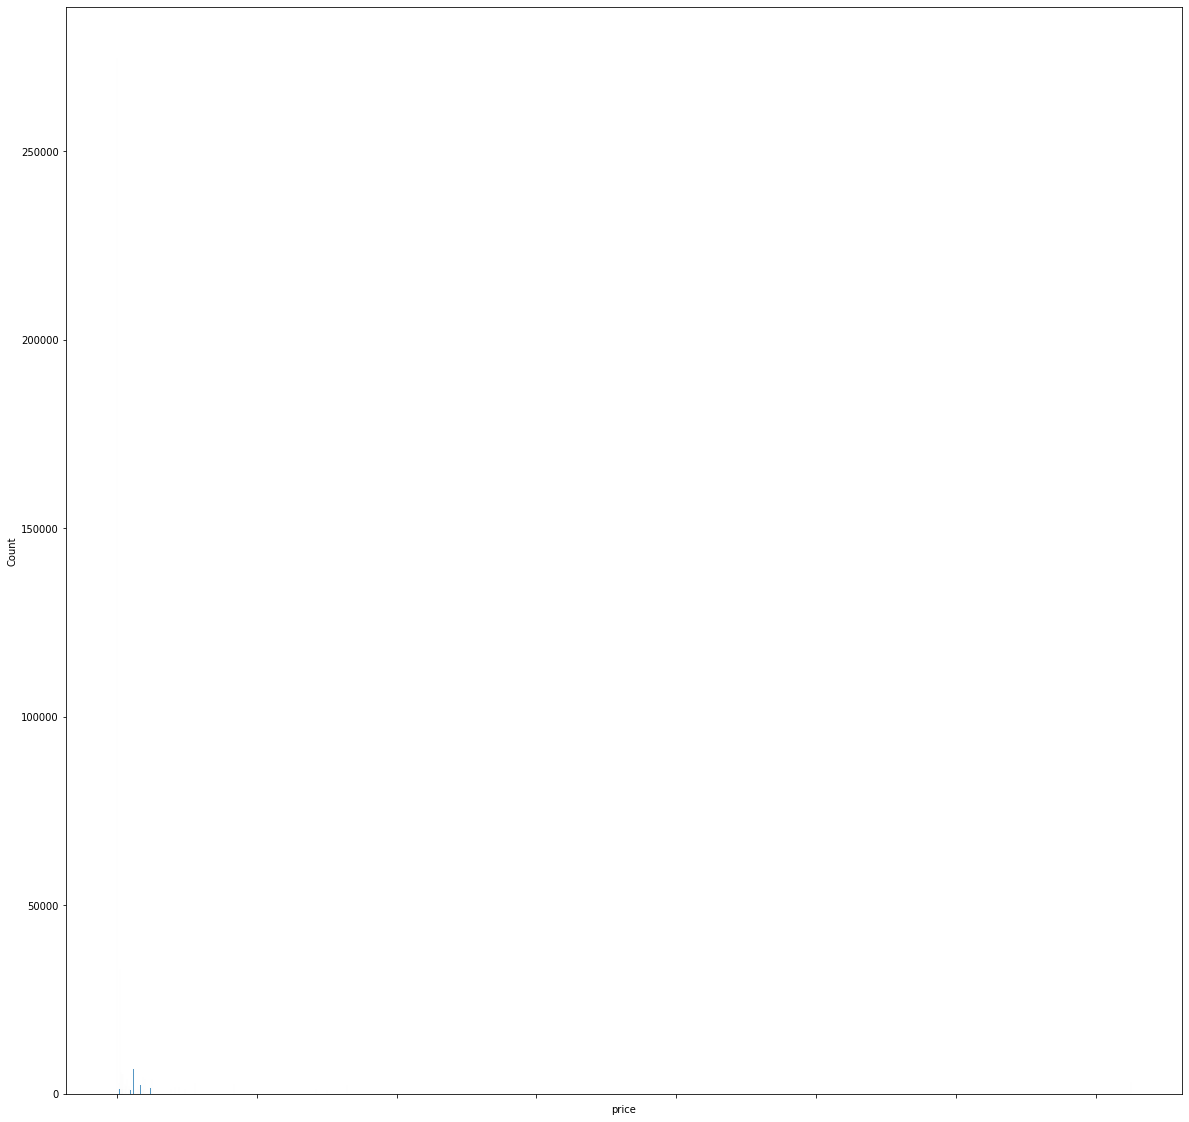

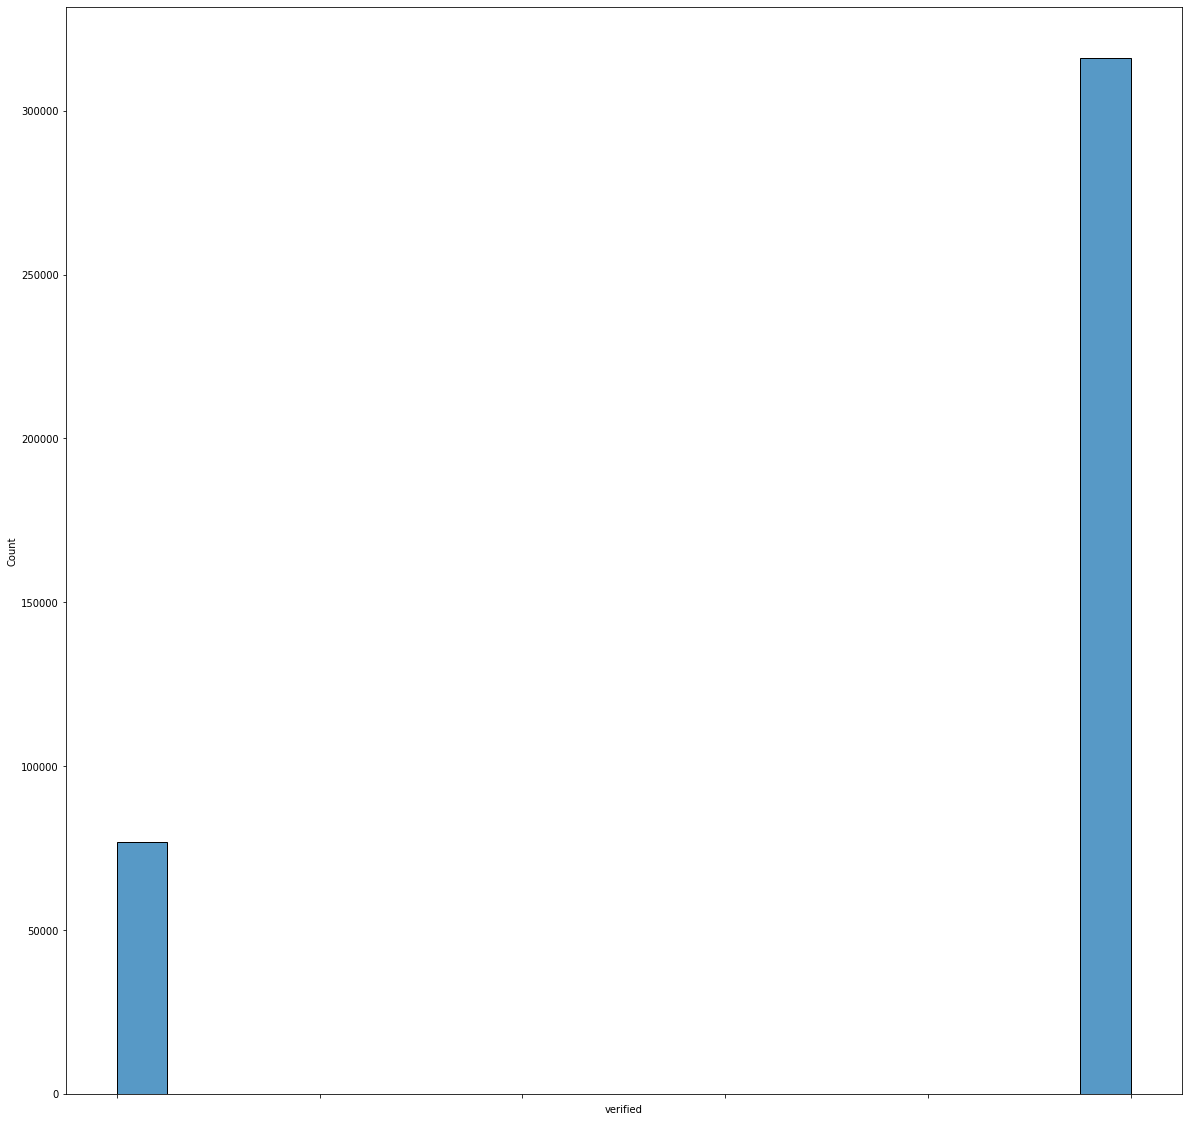

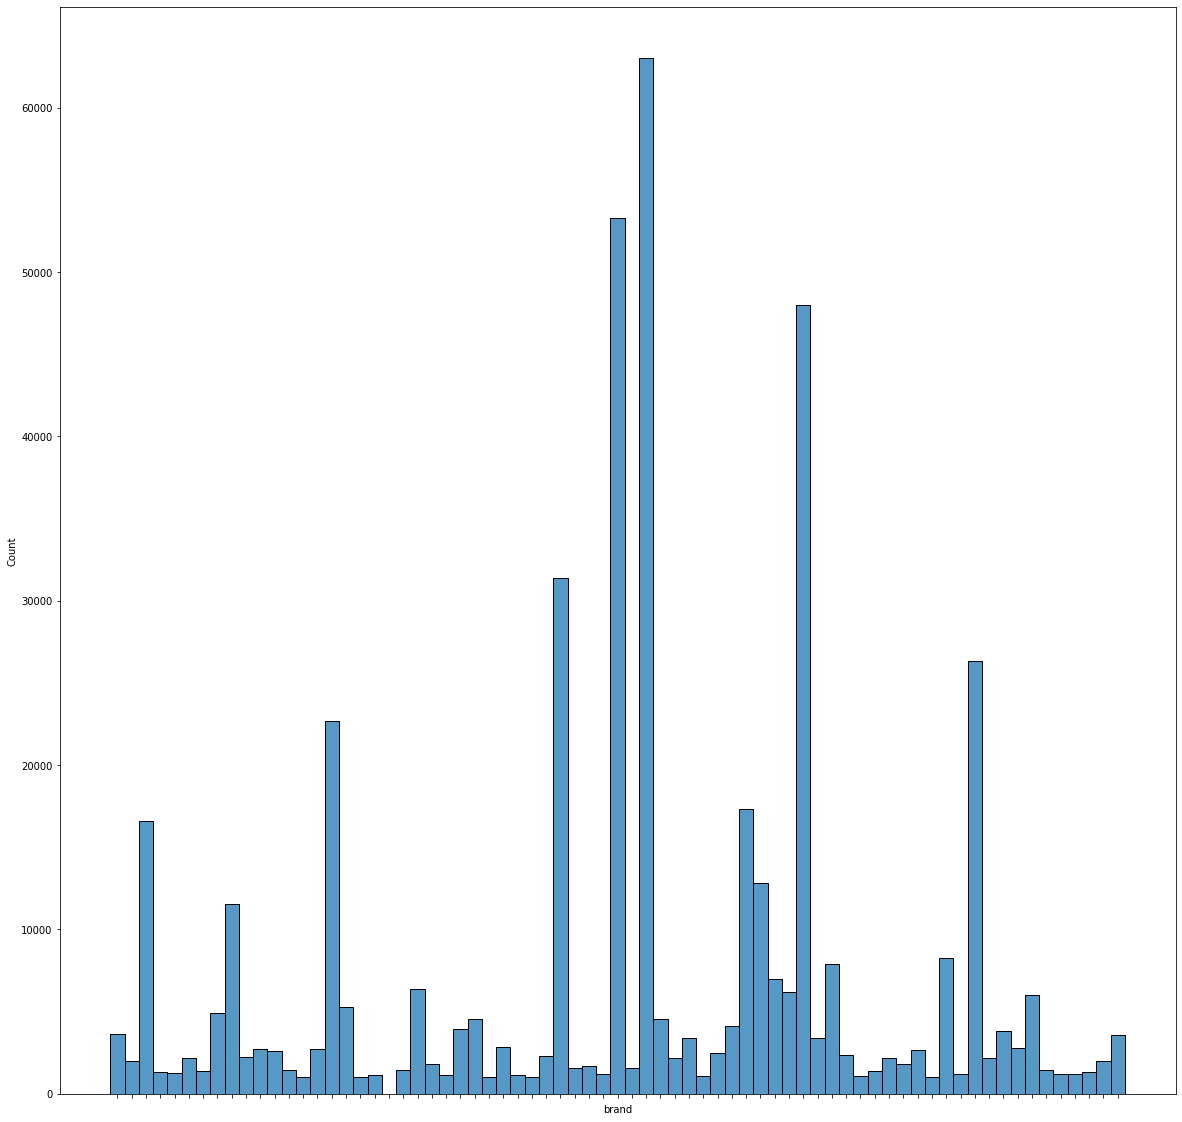

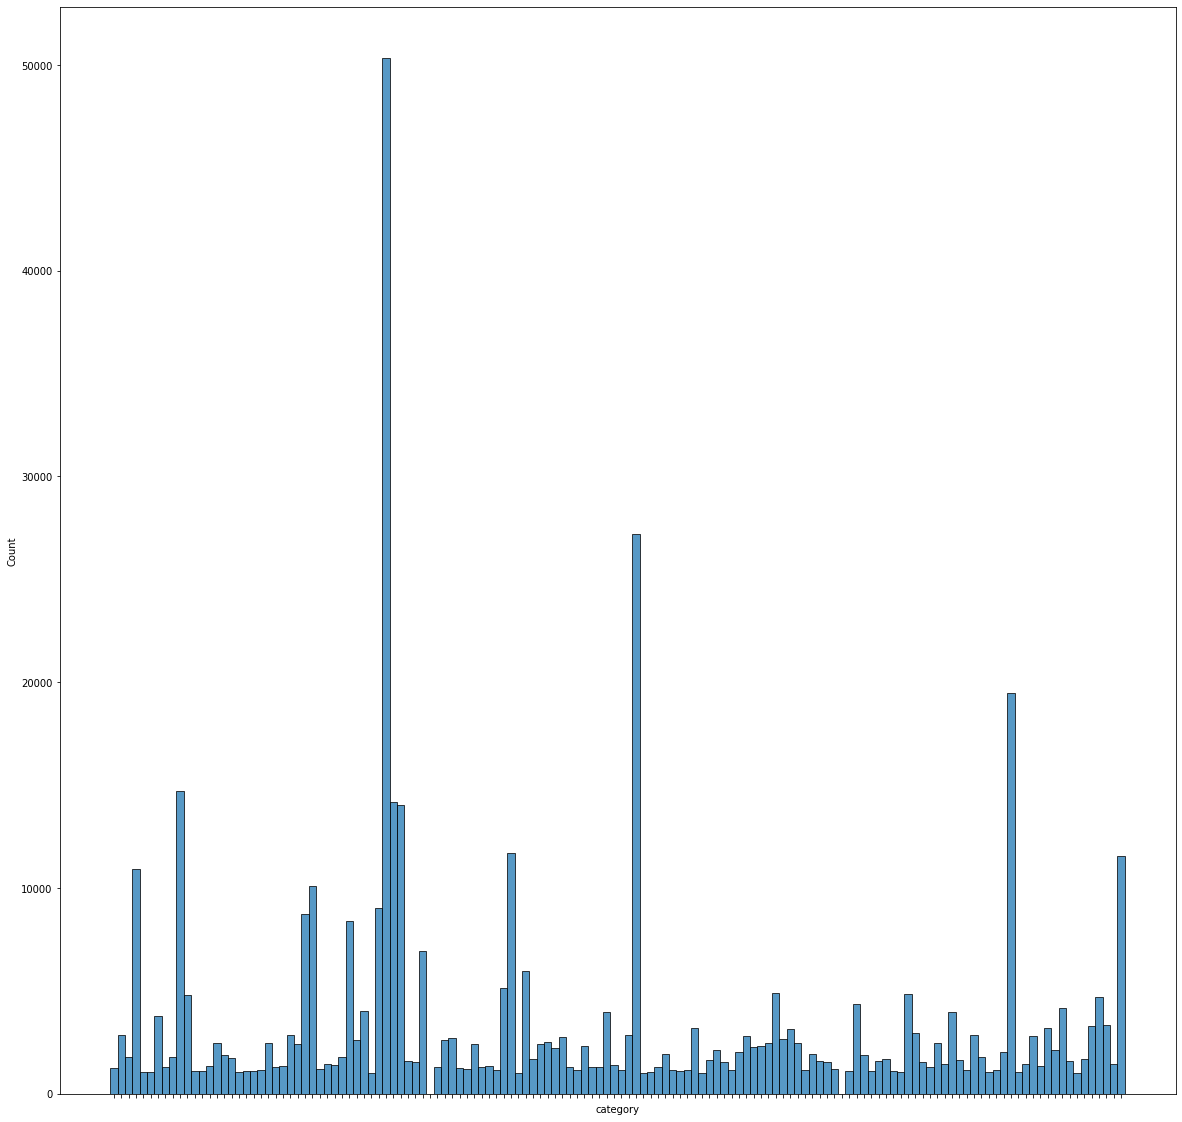

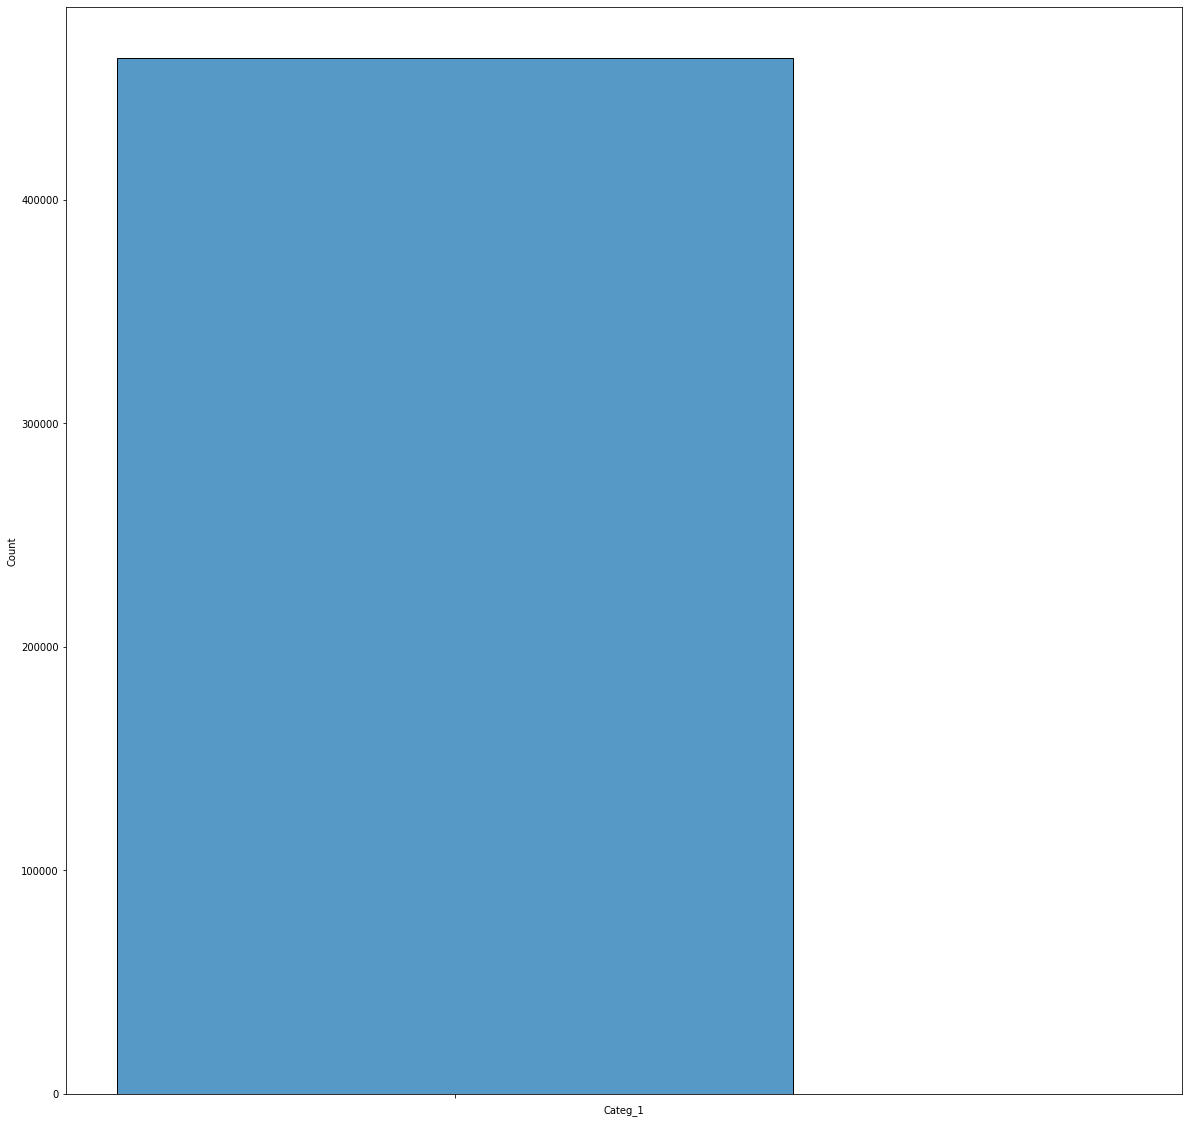

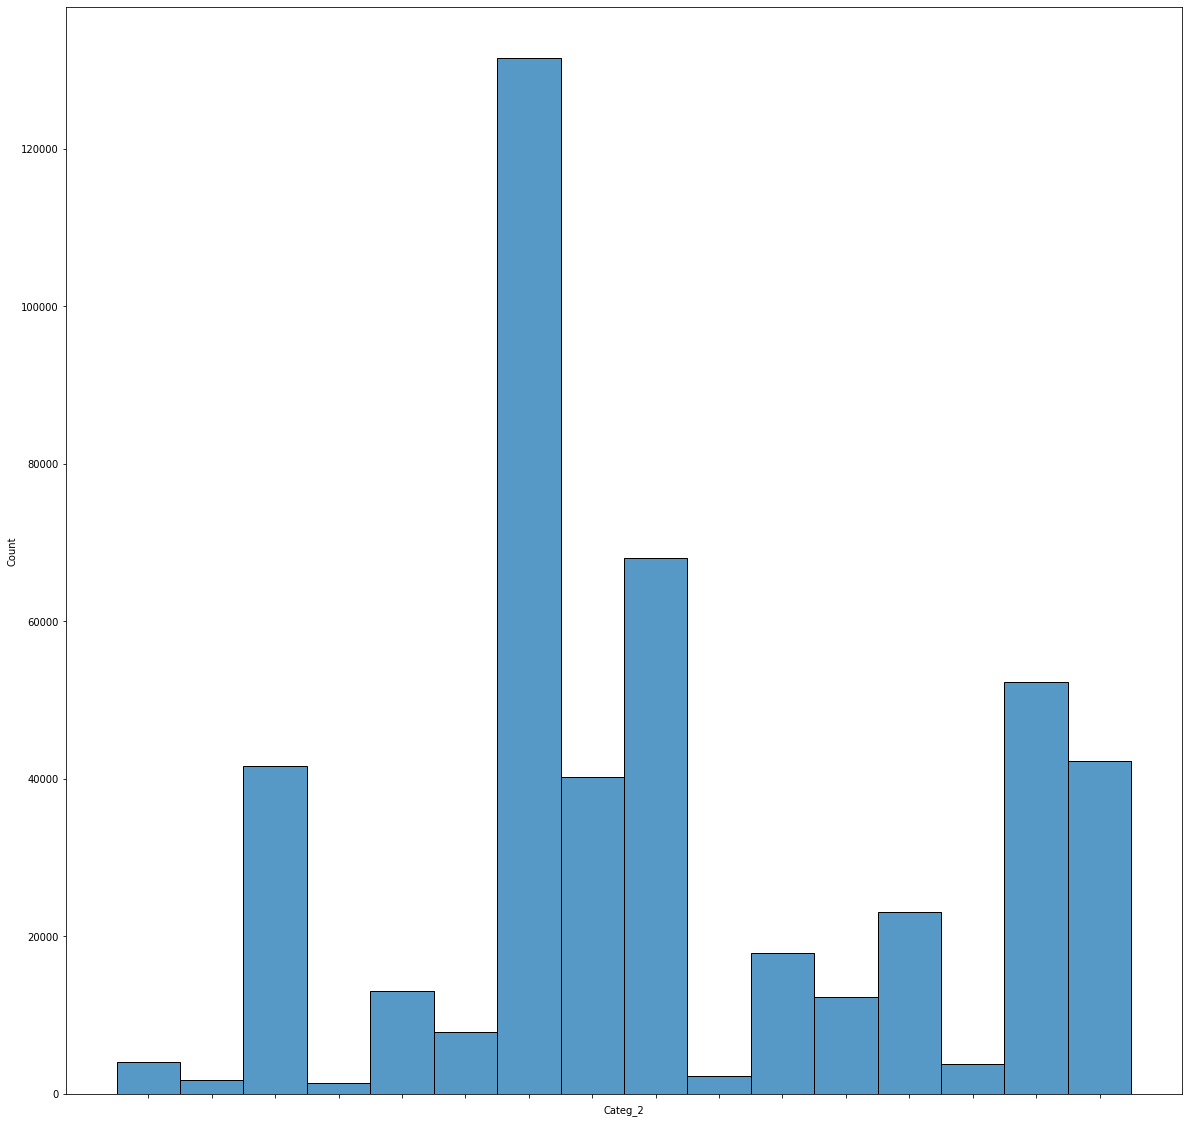

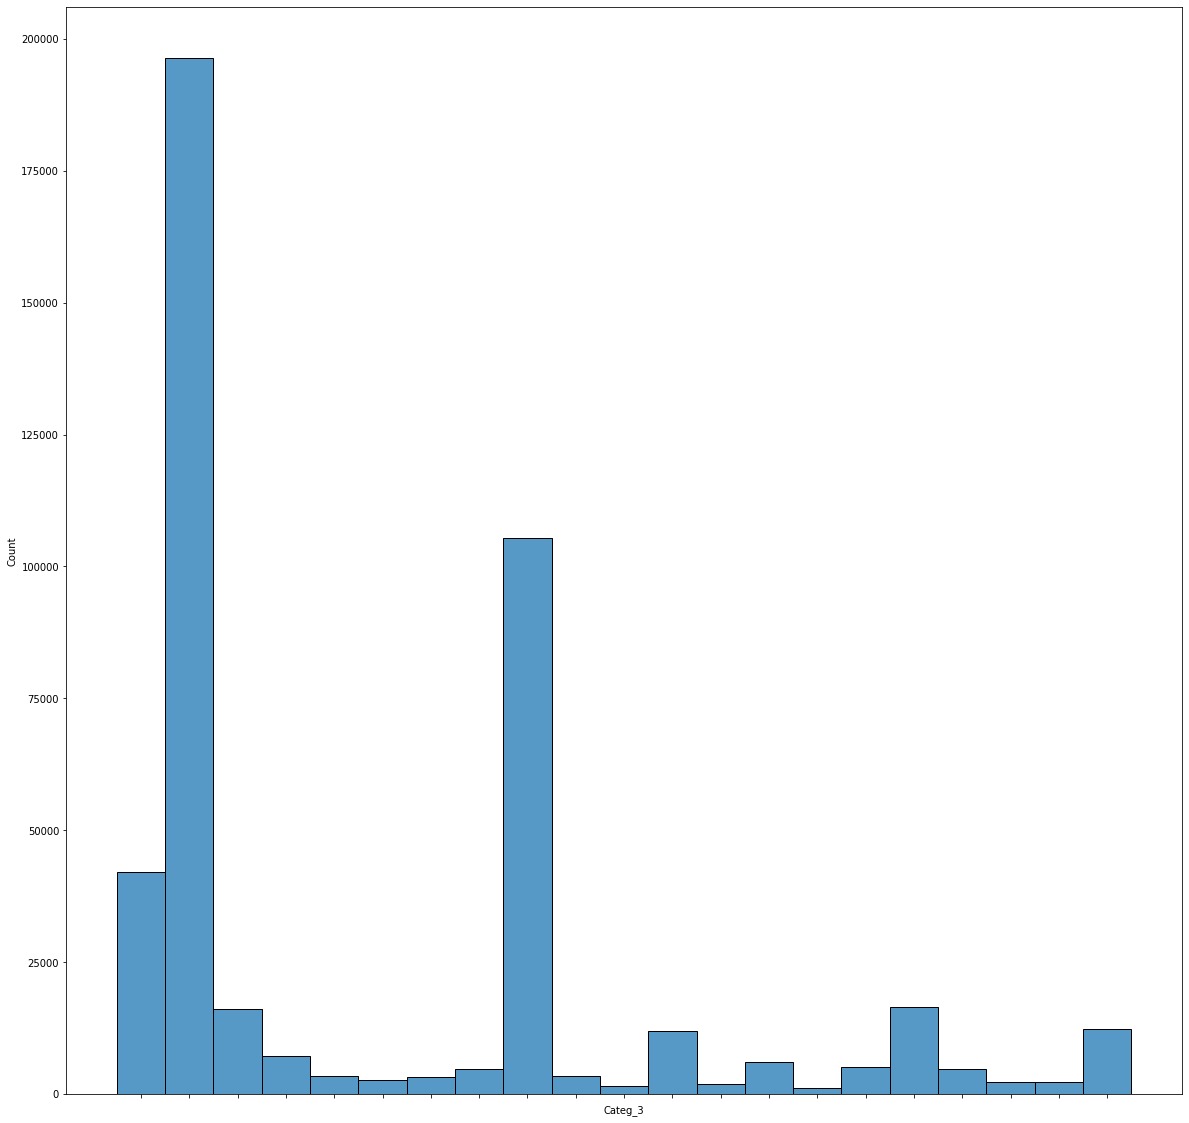

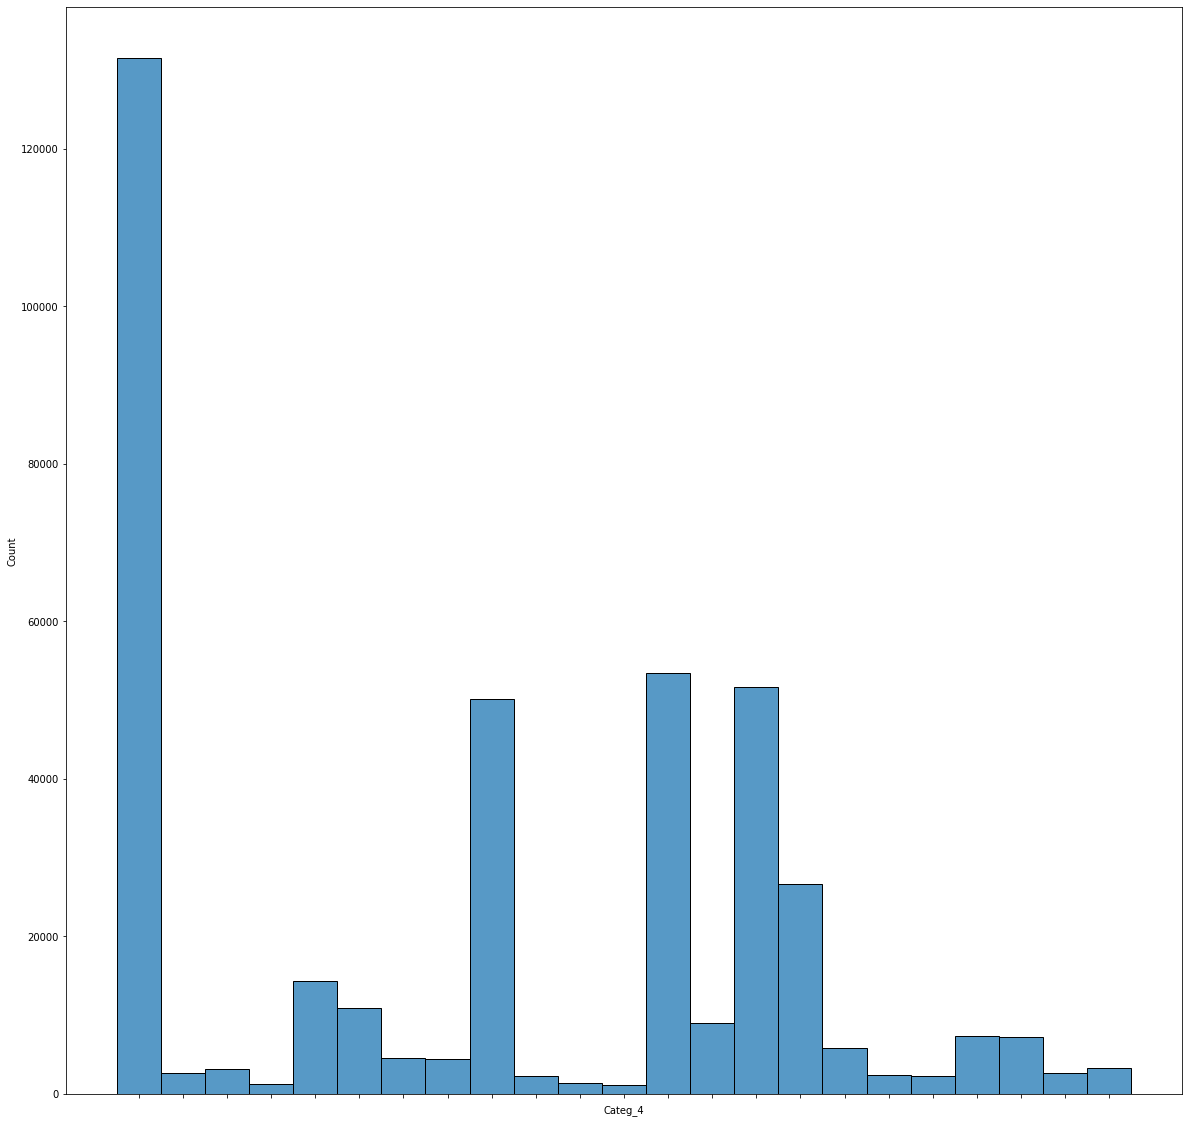

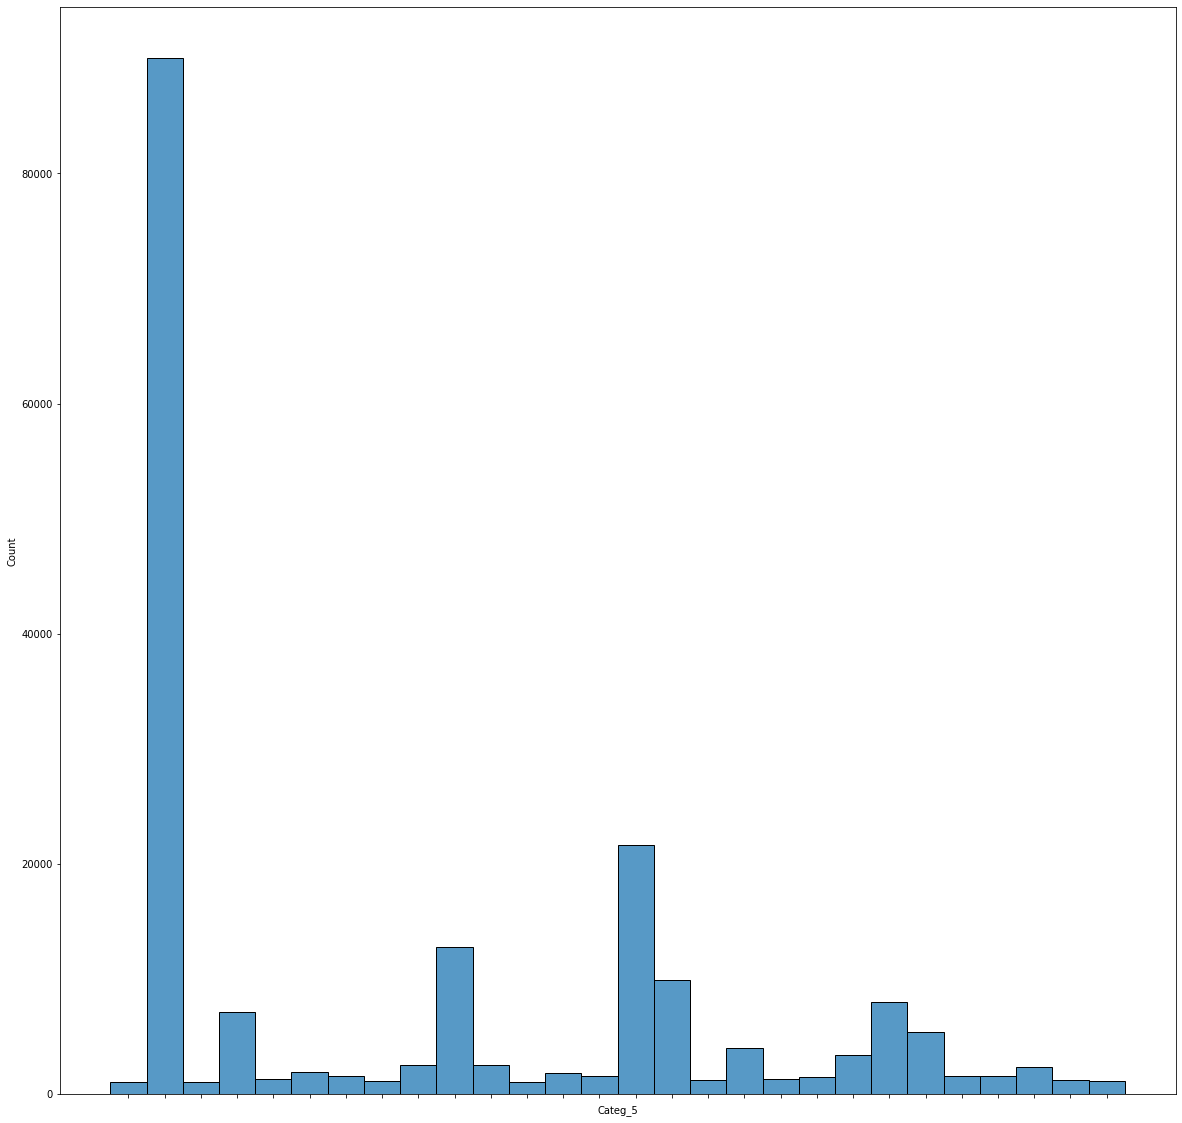

In [98]:
colunas = ['price','verified','brand','category','Categ_1','Categ_2','Categ_3','Categ_4','Categ_5']
ncolunas = len(colunas)

for i in range(0,ncolunas):
  plt.figure(figsize=(20,20))
  fig = sns.histplot(x=colunas[i],data=df)
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
  plt.show()
  plt.close()

# 5. Algoritmo de Classificação  

## 5.1 Preparando os Dados

In [99]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=2000)
X_vect = vectorizer.fit_transform(df['reviewText'].apply(lambda x: np.str_(x)))

In [100]:
n_components = 50
svd          = TruncatedSVD(n_components=n_components)
X_reduzido   = svd.fit_transform(X_vect)
df_class     = pd.DataFrame(X_reduzido)

In [101]:
df_class['target'] = df['verified']

In [102]:
df_class['target'].fillna(-1,inplace=True)

In [103]:
mask1 = (df_class['target'] == 1.0) | (df_class['target'] == 0.0)
mask2 = df_class['target'] == -1

In [104]:
df_class1 = df_class[mask1]
df_class2 = df_class[mask2]

## 5.2 Divisão de Treino e Teste

In [105]:
factor = 0.01
good_sample1 = int(factor*df_class1.shape[0])
df_class1 = df_class1.sample(good_sample1)

In [106]:
X  = df_class1.drop(columns=["target"])
Y  = df_class1["target"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (3110, 50)
Shape y_train: (3110,)
Shape X_test: (778, 50)
Shape y_test: (778,)


In [108]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

## 5.3 Modeling

In [109]:
scores_list = []
K_neighbors = range(1,20)

for k in K_neighbors:

  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores_list.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Acurácia')

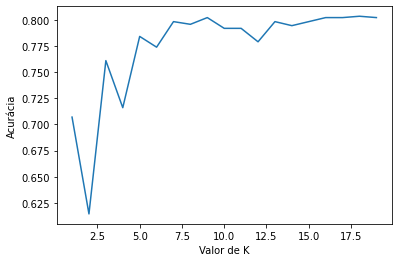

In [110]:
plt.plot(K_neighbors, scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

In [111]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion="entropy"),
    'RandomForestClassifier': RandomForestClassifier(criterion='entropy', n_estimators=150),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB(),
    'SVC_Poly': SVC(kernel='poly'),
    'SVC_Linear': SVC(kernel='linear'),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100, 50, 20),activation='relu'),
 }

KNN
Acccuracy: 79.17737789203085%
Precision: 81.94444444444444%
Recall: 94.85530546623794%
F1: 87.92846497764532%
              precision    recall  f1-score   support

         0.0       0.45      0.17      0.24       156
         1.0       0.82      0.95      0.88       622

    accuracy                           0.79       778
   macro avg       0.63      0.56      0.56       778
weighted avg       0.75      0.79      0.75       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


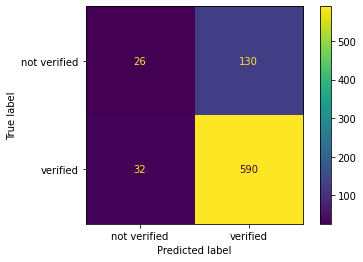

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


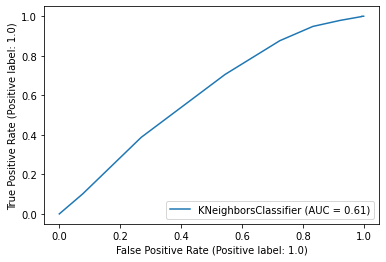

LogisticRegression
Acccuracy: 80.33419023136247%
Precision: 80.25806451612904%
Recall: 100.0%
F1: 89.04795991410164%
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04       156
         1.0       0.80      1.00      0.89       622

    accuracy                           0.80       778
   macro avg       0.90      0.51      0.46       778
weighted avg       0.84      0.80      0.72       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


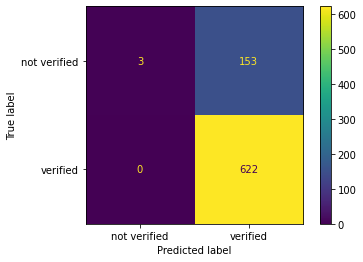

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


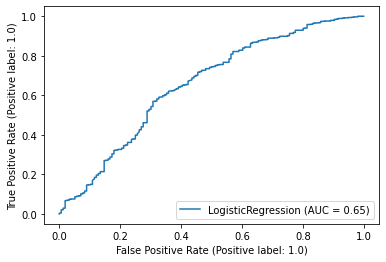

DecisionTreeClassifier
Acccuracy: 70.82262210796915%
Precision: 81.80354267310788%
Recall: 81.67202572347267%
F1: 81.73773129525343%
              precision    recall  f1-score   support

         0.0       0.27      0.28      0.27       156
         1.0       0.82      0.82      0.82       622

    accuracy                           0.71       778
   macro avg       0.55      0.55      0.55       778
weighted avg       0.71      0.71      0.71       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


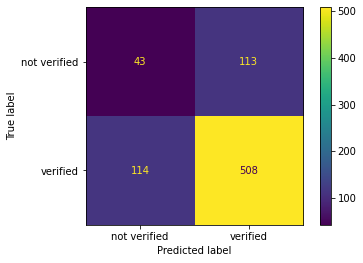

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


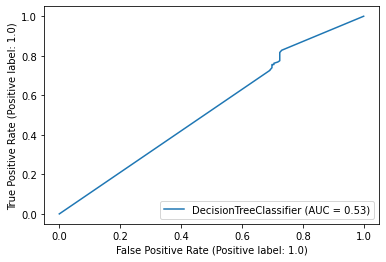

RandomForestClassifier
Acccuracy: 80.0771208226221%
Precision: 80.4432855280313%
Recall: 99.19614147909968%
F1: 88.84089272858172%
              precision    recall  f1-score   support

         0.0       0.55      0.04      0.07       156
         1.0       0.80      0.99      0.89       622

    accuracy                           0.80       778
   macro avg       0.67      0.52      0.48       778
weighted avg       0.75      0.80      0.72       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


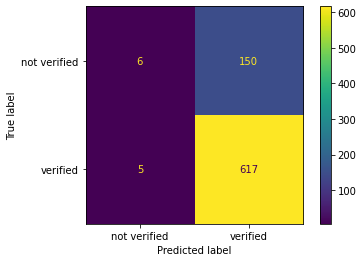

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


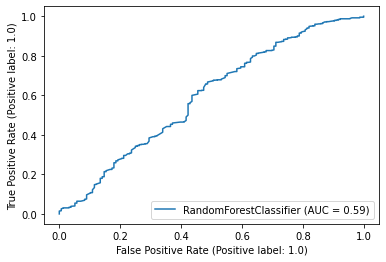

GaussianNB
Acccuracy: 53.34190231362468%
Precision: 83.63636363636363%
Recall: 51.76848874598071%
F1: 63.95233366434956%
              precision    recall  f1-score   support

         0.0       0.24      0.60      0.34       156
         1.0       0.84      0.52      0.64       622

    accuracy                           0.53       778
   macro avg       0.54      0.56      0.49       778
weighted avg       0.72      0.53      0.58       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


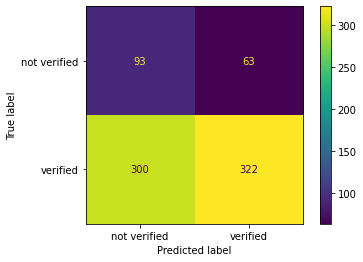

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


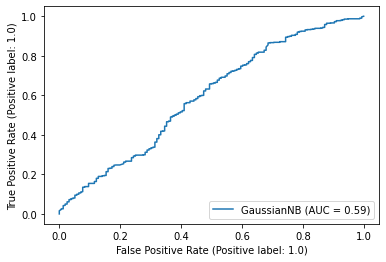

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MultinomialNB
Acccuracy: 79.94858611825192%
Precision: 79.94858611825192%
Recall: 100.0%
F1: 88.85714285714286%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       156
         1.0       0.80      1.00      0.89       622

    accuracy                           0.80       778
   macro avg       0.40      0.50      0.44       778
weighted avg       0.64      0.80      0.71       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


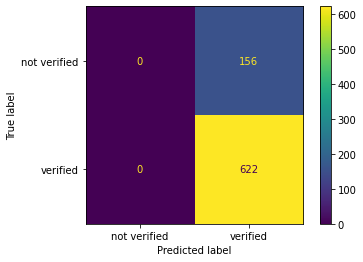

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


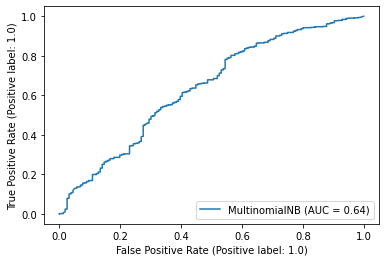

ComplementNB
Acccuracy: 63.88174807197944%
Precision: 84.58417849898579%
Recall: 67.04180064308682%
F1: 74.7982062780269%
              precision    recall  f1-score   support

         0.0       0.28      0.51      0.36       156
         1.0       0.85      0.67      0.75       622

    accuracy                           0.64       778
   macro avg       0.56      0.59      0.56       778
weighted avg       0.73      0.64      0.67       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


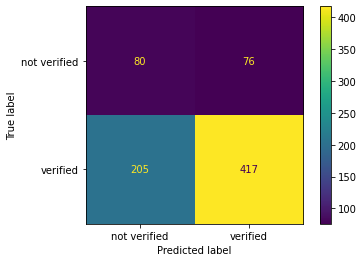

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


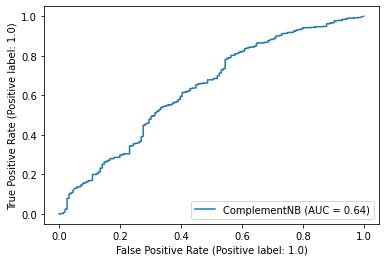

BernoulliNB
Acccuracy: 79.94858611825192%
Precision: 79.94858611825192%
Recall: 100.0%
F1: 88.85714285714286%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       156
         1.0       0.80      1.00      0.89       622

    accuracy                           0.80       778
   macro avg       0.40      0.50      0.44       778
weighted avg       0.64      0.80      0.71       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

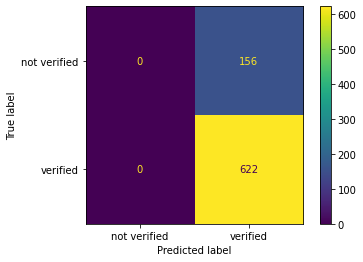

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


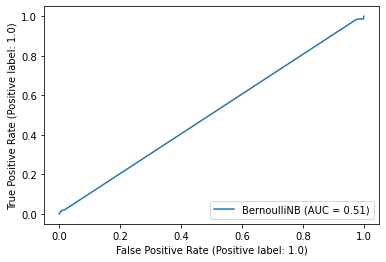

SVC_Poly
Acccuracy: 77.37789203084833%
Precision: 80.71625344352617%
Recall: 94.21221864951768%
F1: 86.94362017804154%
              precision    recall  f1-score   support

         0.0       0.31      0.10      0.15       156
         1.0       0.81      0.94      0.87       622

    accuracy                           0.77       778
   macro avg       0.56      0.52      0.51       778
weighted avg       0.71      0.77      0.73       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


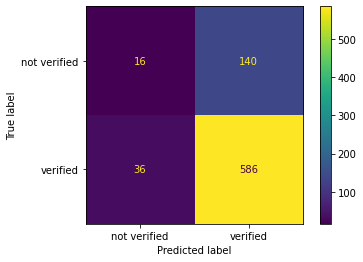

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


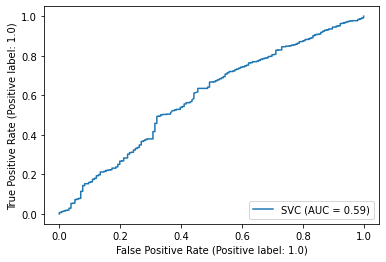

SVC_Linear
Acccuracy: 79.94858611825192%
Precision: 79.94858611825192%
Recall: 100.0%
F1: 88.85714285714286%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       156
         1.0       0.80      1.00      0.89       622

    accuracy                           0.80       778
   macro avg       0.40      0.50      0.44       778
weighted avg       0.64      0.80      0.71       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

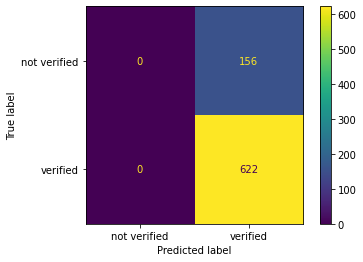

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


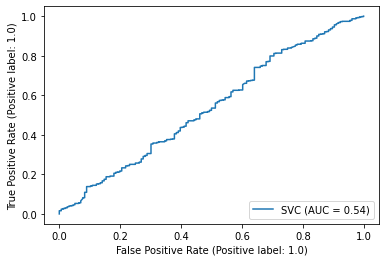

KNeighborsClassifier
Acccuracy: 78.40616966580977%
Precision: 81.52777777777777%
Recall: 94.37299035369774%
F1: 87.48137108792847%
              precision    recall  f1-score   support

         0.0       0.40      0.15      0.21       156
         1.0       0.82      0.94      0.87       622

    accuracy                           0.78       778
   macro avg       0.61      0.55      0.54       778
weighted avg       0.73      0.78      0.74       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


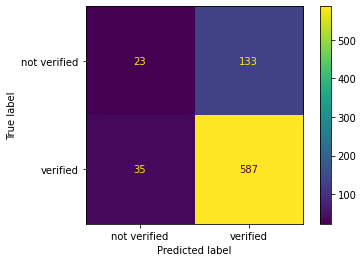

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


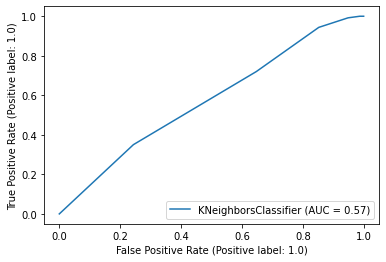

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


MLPClassifier
Acccuracy: 78.27763496143959%
Precision: 82.49641319942612%
Recall: 92.44372990353698%
F1: 87.18726307808946%
              precision    recall  f1-score   support

         0.0       0.42      0.22      0.29       156
         1.0       0.82      0.92      0.87       622

    accuracy                           0.78       778
   macro avg       0.62      0.57      0.58       778
weighted avg       0.74      0.78      0.75       778



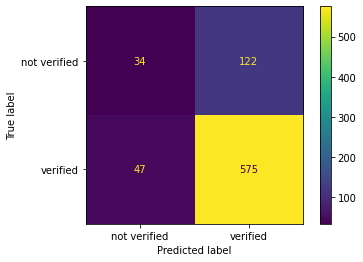

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


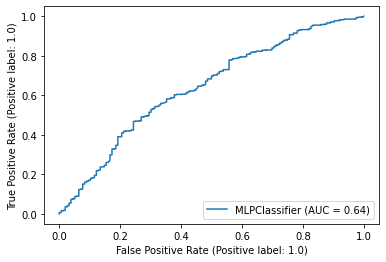

In [112]:
f1score_list    = []
accuracy_list   = []
recall_list     = []
precission_list = []
clf_list        = []

for name, model in models.items():

  clf = model
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  accuracy  = accuracy_score(y_test, y_pred)*100
  precision = precision_score(y_test, y_pred)*100
  recall    = recall_score(y_test, y_pred)*100
  f1score   = f1_score(y_test, y_pred)*100
  f1score_list.append(accuracy)
  accuracy_list.append(precision)
  recall_list.append(recall)
  precission_list.append(f1score)
  clf_list.append(name)

  print('======================================================================')
  print(name)
  print(f"Acccuracy: {accuracy}%")
  print(f"Precision: {precision}%")
  print(f"Recall: {recall}%")
  print(f"F1: {f1score}%")

  print(classification_report(y_test, y_pred))

  plot_confusion_matrix(clf, X_test, y_test, display_labels=['not verified','verified'], values_format='d')
  plt.grid(False)
  plt.show()

  plot_roc_curve(clf, X_test, y_test)
  plt.show()
  print('======================================================================')

In [113]:
df_metricas = pd.DataFrame({'Classificador': clf_list, 'F1-Score': f1score_list, 'Accuracy': accuracy_list, 'Recall': recall_list, 'Precission': precission_list})

In [114]:
df_metricas.sort_values(by='F1-Score', ascending=False)

,Classificador,F1-Score,Accuracy,Recall,Precission
1,LogisticRegression,80.334190,80.258065,100.000000,89.047960
3,RandomForestClassifier,80.077121,80.443286,99.196141,88.840893
5,MultinomialNB,79.948586,79.948586,100.000000,88.857143
7,BernoulliNB,79.948586,79.948586,100.000000,88.857143
9,SVC_Linear,79.948586,79.948586,100.000000,88.857143
0,KNN,79.177378,81.944444,94.855305,87.928465
10,KNeighborsClassifier,78.406170,81.527778,94.372990,87.481371
11,MLPClassifier,78.277635,82.496413,92.443730,87.187263
8,SVC_Poly,77.377892,80.716253,94.212219,86.943620
2,DecisionTreeClassifier,70.822622,81.803543,81.672026,81.737731


## 5.4 Tuning Best Model

In [115]:
n_estimators      = [100, 300, 500, 800, 1200]
max_depth         = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf  = [1, 2, 5, 10] 
hyperparam        = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

In [116]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf,hyperparam, cv = 3, verbose = 1, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]},
                   verbose=1)

In [117]:
rf_random.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'n_estimators': 100}

Acccuracy: 79.94858611825192%
Precision: 79.94858611825192%
Recall: 100.0%
F1: 88.85714285714286%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       156
         1.0       0.80      1.00      0.89       622

    accuracy                           0.80       778
   macro avg       0.40      0.50      0.44       778
weighted avg       0.64      0.80      0.71       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

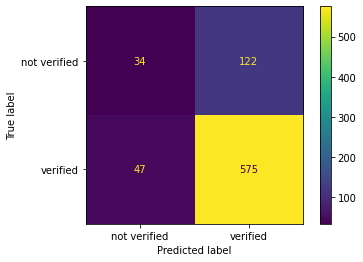

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


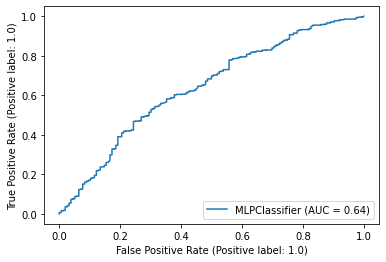

In [118]:
best_random = rf_random.best_estimator_
best_random.fit(X_train,y_train)
y_pred     = best_random.predict(X_test)
f1score    = np.mean(f1_score(y_test, y_pred,average=None))*100
accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100

print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=['not verified','verified'], values_format='d')
plt.grid(False)
plt.show()

plot_roc_curve(clf, X_test, y_test)
plt.show()

## 5.5 Testando Com Novas Bases de Dados

Teste 1
Acccuracy: 81.36246786632391%
Precision: 81.36246786632391%
Recall: 100.0%
F1: 89.72360028348689%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       145
         1.0       0.81      1.00      0.90       633

    accuracy                           0.81       778
   macro avg       0.41      0.50      0.45       778
weighted avg       0.66      0.81      0.73       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

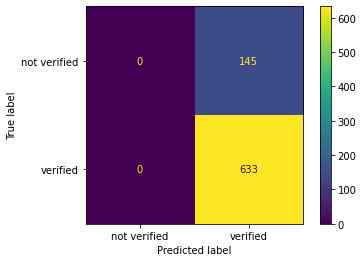

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


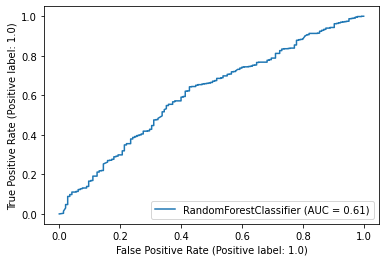

Teste 2
Acccuracy: 79.17737789203085%
Precision: 79.27927927927928%
Recall: 99.83792544570503%
F1: 88.37876614060256%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       161
         1.0       0.79      1.00      0.88       617

    accuracy                           0.79       778
   macro avg       0.40      0.50      0.44       778
weighted avg       0.63      0.79      0.70       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


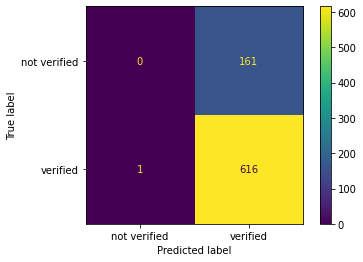

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


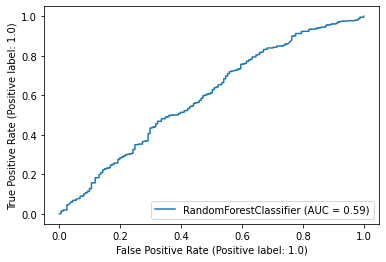

Teste 3
Acccuracy: 78.66323907455013%
Precision: 78.63577863577864%
Recall: 100.0%
F1: 88.04034582132564%
              precision    recall  f1-score   support

         0.0       1.00      0.01      0.01       167
         1.0       0.79      1.00      0.88       611

    accuracy                           0.79       778
   macro avg       0.89      0.50      0.45       778
weighted avg       0.83      0.79      0.69       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


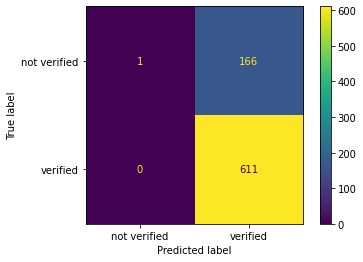

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


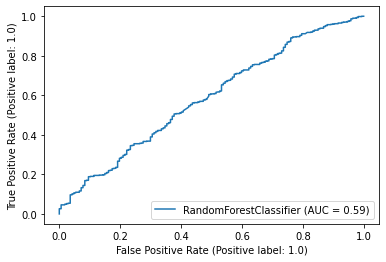

Teste 4
Acccuracy: 81.49100257069408%
Precision: 81.5721649484536%
Recall: 99.84227129337539%
F1: 89.7872340425532%
              precision    recall  f1-score   support

         0.0       0.50      0.01      0.01       144
         1.0       0.82      1.00      0.90       634

    accuracy                           0.81       778
   macro avg       0.66      0.50      0.46       778
weighted avg       0.76      0.81      0.73       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


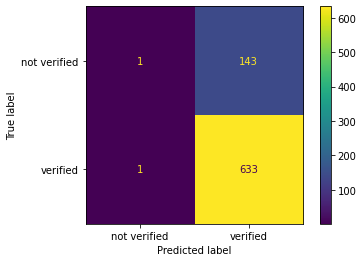

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


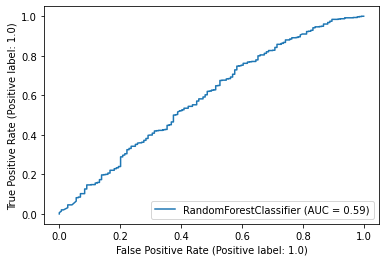

Teste 5
Acccuracy: 78.53470437017995%
Precision: 78.53470437017995%
Recall: 100.0%
F1: 87.97696184305256%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       167
         1.0       0.79      1.00      0.88       611

    accuracy                           0.79       778
   macro avg       0.39      0.50      0.44       778
weighted avg       0.62      0.79      0.69       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

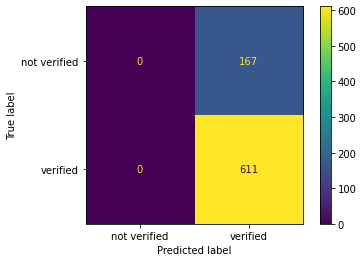

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


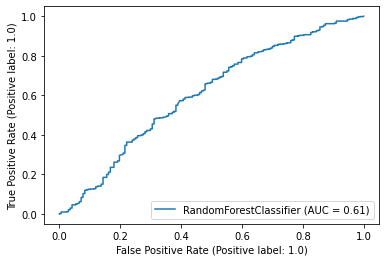

Teste 6
Acccuracy: 79.94858611825192%
Precision: 79.94858611825192%
Recall: 100.0%
F1: 88.85714285714286%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       156
         1.0       0.80      1.00      0.89       622

    accuracy                           0.80       778
   macro avg       0.40      0.50      0.44       778
weighted avg       0.64      0.80      0.71       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

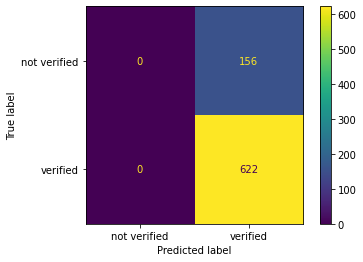

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


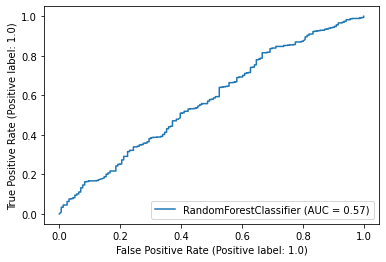

Teste 7
Acccuracy: 81.74807197943444%
Precision: 81.74807197943444%
Recall: 100.0%
F1: 89.95756718528996%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       142
         1.0       0.82      1.00      0.90       636

    accuracy                           0.82       778
   macro avg       0.41      0.50      0.45       778
weighted avg       0.67      0.82      0.74       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

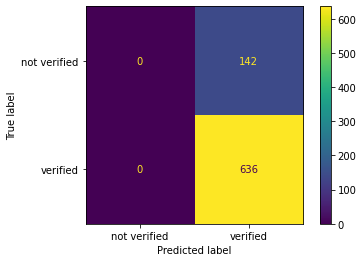

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


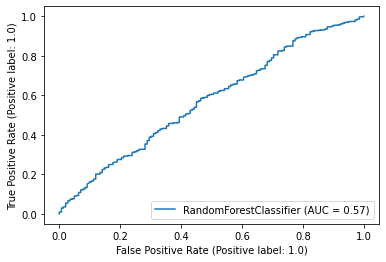

Teste 8
Acccuracy: 81.49100257069408%
Precision: 81.49100257069408%
Recall: 100.0%
F1: 89.80169971671388%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       144
         1.0       0.81      1.00      0.90       634

    accuracy                           0.81       778
   macro avg       0.41      0.50      0.45       778
weighted avg       0.66      0.81      0.73       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

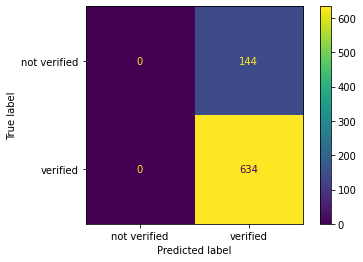

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


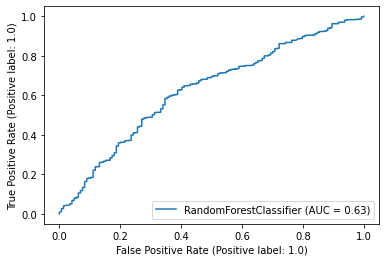

Teste 9
Acccuracy: 81.61953727506427%
Precision: 81.61953727506427%
Recall: 100.0%
F1: 89.87968860580325%
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       143
         1.0       0.82      1.00      0.90       635

    accuracy                           0.82       778
   macro avg       0.41      0.50      0.45       778
weighted avg       0.67      0.82      0.73       778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

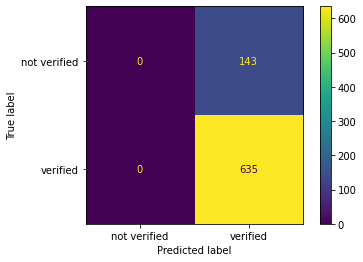

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


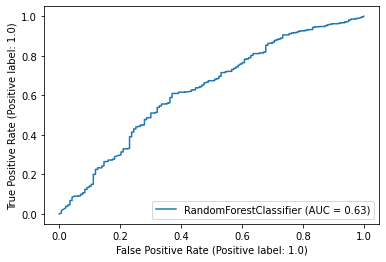

Teste 10
Acccuracy: 79.94858611825192%
Precision: 79.79274611398964%
Recall: 100.0%
F1: 88.7608069164265%
              precision    recall  f1-score   support

         0.0       1.00      0.04      0.07       162
         1.0       0.80      1.00      0.89       616

    accuracy                           0.80       778
   macro avg       0.90      0.52      0.48       778
weighted avg       0.84      0.80      0.72       778



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


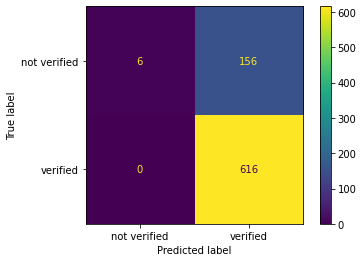

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


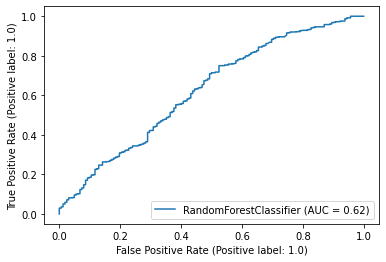

In [119]:
nteste = 10
factor = 0.01

for i in range(0,nteste):

  print('======================================================================')
  print('Teste %d'%(i+1))
  
  df_class1 = df_class[mask1]
  good_sample1 = int(factor*df_class1.shape[0])
  df_class1 = df_class1.sample(good_sample1)
  X  = df_class1.drop(columns=["target"])
  Y  = df_class1["target"]
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
  X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

  clf = rf_random.best_estimator_
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  accuracy  = accuracy_score(y_test, y_pred)*100
  precision = precision_score(y_test, y_pred)*100
  recall    = recall_score(y_test, y_pred)*100
  f1score   = f1_score(y_test, y_pred)*100

  print(f"Acccuracy: {accuracy}%")
  print(f"Precision: {precision}%")
  print(f"Recall: {recall}%")
  print(f"F1: {f1score}%")

  print(classification_report(y_test, y_pred))

  plot_confusion_matrix(clf, X_test, y_test, display_labels=['not verified','verified'], values_format='d')
  plt.grid(False)
  plt.show()

  plot_roc_curve(clf, X_test, y_test)
  plt.show()
  print('======================================================================')

## 5.6 Classificando toda a Base de Dados

Acccuracy: 81.14481144811448%
Precision: 81.20898190310922%
Recall: 99.57922692947652%
F1: 89.46078607515793%
              precision    recall  f1-score   support

         0.0       0.77      0.06      0.11     15273
         1.0       0.81      1.00      0.89     62504

    accuracy                           0.81     77777
   macro avg       0.79      0.53      0.50     77777
weighted avg       0.80      0.81      0.74     77777



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


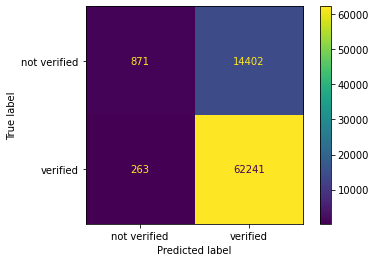

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


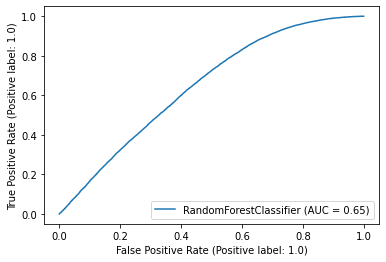

In [120]:
df_class_full = df_class.copy()

factor         = 1
good_sample1   = int(factor*df_class_full.shape[0])
df_class_full1 = df_class_full.sample(good_sample1)

mask = df_class_full1['target'] != -1
df_class_full1 = df_class_full1[mask]

X  = df_class_full1.drop(columns=["target"])
Y  = df_class_full1["target"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

clf = rf_random.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100

print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=['not verified','verified'], values_format='d')
plt.grid(False)
plt.show()

plot_roc_curve(clf, X_test, y_test)
plt.show()

In [121]:
X        = df_class_full.drop(columns=["target"])
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
y_pred   = clf.predict(X_scaled)
df['new_classification'] = y_pred

# 6. Algoritmo de Recomendação

## 6.1 Gerando Soma de Avaliações

In [122]:
df_recomend = df[['asin','new_classification']]

In [123]:
#df_recomend = df[['asin','verified']]
#df_recomend['verified'].fillna(0,inplace=True)

In [124]:
df_sum = df_recomend.groupby(by=['asin'], dropna=False,as_index=False).sum()

In [125]:
df_sum.columns = ['Produto','Total de Avaliações']

In [126]:
df_sum['Total de Avaliações'] = df_sum['Total de Avaliações'].astype('int')

## 6.2 Gerando Produto Aleatório

In [127]:
vet_prod  = df_sum['Produto'].unique()
prod_id   =  random.randint(0,vet_prod.shape[0])
prod_name = vet_prod[prod_id]

## 6.3 Exibindo Total de Avalições ou os 10 Melhores Avaliados

In [128]:
mask = df_sum['Produto'] == prod_name
df_result = df_sum[mask]

if(df_result.shape[0]>0):

  display(df_result)

else:

  display(df_sum.sort_values(by='Total de Avaliações', ascending=False).head(10))

,Produto,Total de Avaliações
171,B00GU4F4OM,1381


In [129]:
mask = df_sum['Produto'] == 'ID Inexistente'
df_result = df_sum[mask]

if(df_result.shape[0]>0):

  display(df_result)

else:

  display(df_sum.sort_values(by='Total de Avaliações', ascending=False).head(10))

,Produto,Total de Avaliações
44,B00178630A,7490
173,B00HTK1NCS,6461
77,B004RMK57U,5133
188,B00KKAQYXM,4359
9,B00009OY9U,4024
181,B00JJNQG98,3960
71,B003ZSP0WW,3960
35,B000ZKA0J6,3824
153,B00E4MQODC,3519
12,B000B9RI14,3345
